## Import Libraries and load Data

In [1462]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib
from matplotlib import colors
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
import sys
import pickle
from yellowbrick.cluster import KElbowVisualizer

In [1463]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [1464]:
df.dropna(inplace=True)

In [1465]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [1466]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [1467]:
df = df.drop(columns=["id", "z_costcontact","z_revenue"])

### create new column "age"

In [1468]:
df["age"] = 2014 - df["year_birth"]

In [1469]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [1470]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [1471]:
max(df["age"])

121

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

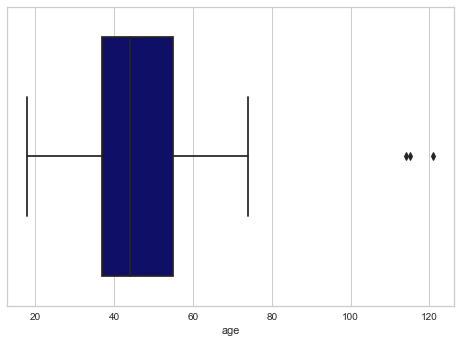

In [1472]:
sns.boxplot(df["age"])

In [1473]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [1474]:
df.drop([239], axis=0, inplace=True)

In [1475]:
max(df["age"])

115

In [1476]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [1477]:
df.drop([339], axis=0, inplace=True)

In [1478]:
max(df["age"])

114

In [1479]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [1480]:
df.drop([192], axis=0, inplace=True)

In [1481]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [1482]:
type(df["dt_customer"][0])

str

def date(datestr="", format="%d-%m-%Y"):
    from datetime import datetime
    if not datestr:
        return datetime.today().date()
    return datetime.strptime(datestr, format).date()

In [1483]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

### create "cust_since" column + drop "dt_customer"

In [1484]:
#Convert datetime column/series to month
df['cust_since'] = df['dt_customer'].dt.month

In [1485]:
df['cust_since']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: cust_since, Length: 2213, dtype: int64

In [1486]:
df["cust_since"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [1487]:
df["cust_since"] = df["cust_since"].astype("Int64")

In [1488]:
df[["cust_since", "dt_customer"]]

,cust_since,dt_customer
0,21,2012-09-04
1,3,2014-03-08
2,10,2013-08-21
3,4,2014-02-10
4,5,2014-01-19
...,...,...
2235,12,2013-06-13
2236,0,2014-06-10
2237,5,2014-01-25
2238,5,2014-01-24


In [1489]:
df.drop(["dt_customer"],axis=1, inplace=True)

### clean education column

In [1490]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [1491]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "0"
    elif x in ['Graduation']:
        return "1"
    elif x in ['Master', 'PhD']:
        return "2"

In [1492]:
df['education'] = list(map(clean_edu, df['education']))

In [1493]:
df['education'] = df['education'].astype(int)

### convert "income" to int

In [1494]:
max(df["income"])

666666.0

In [1495]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2233,1,Together,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,37,12


In [1496]:
df.drop([2233], axis=0, inplace=True)

In [1497]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [1498]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1499]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2177,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,0,41,20
2202,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,1,41,20


In [1500]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [1501]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [1502]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "1"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "0"

In [1503]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

In [1504]:
df['marital_status'] = df['marital_status'].astype(int)

### new column "children"

In [1505]:
df["children"]= df["kidhome"] + df["teenhome"]

### concatenate campaigns 

In [1506]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [1507]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [1508]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [1509]:
 #column "household_size"
 #column "total_amount_spent"

### creating household size column

In [1510]:
df.dtypes

education              int64
marital_status         int64
income                 Int64
kidhome                int64
teenhome               int64
recency                int64
mntwines               int64
mntfruits              int64
mntmeatproducts        int64
mntfishproducts        int64
mntsweetproducts       int64
mntgoldprods           int64
numdealspurchases      int64
numwebpurchases        int64
numcatalogpurchases    int64
numstorepurchases      int64
numwebvisitsmonth      int64
complain               int64
response               int64
age                    int64
cust_since             Int64
children               int64
acc_camp               int64
dtype: object

In [1511]:
df["household_size"] = df["marital_status"] + df["children"] + 1

In [1512]:
df.drop(["children"], axis=1, inplace=True)

## plotting

### correlation heatmap

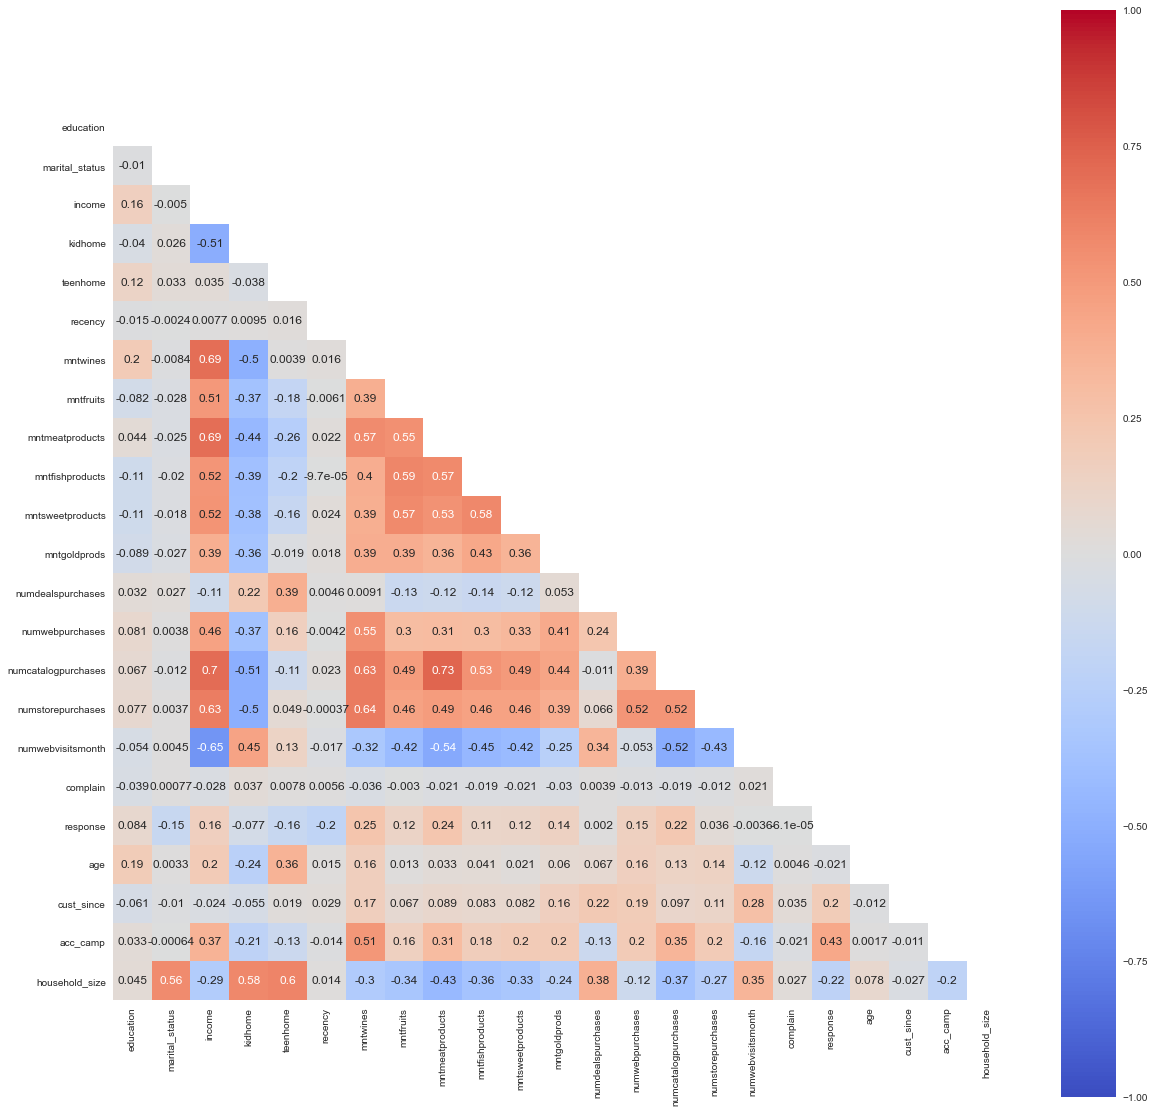

In [1513]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [1514]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['income'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

['numcatalogpurchases', 'mntmeatproducts', 'mntwines', 'numwebvisitsmonth', 'numstorepurchases', 'mntsweetproducts', 'mntfishproducts', 'kidhome', 'mntfruits', 'numwebpurchases', 'mntgoldprods', 'acc_camp', 'income']


,numcatalogpurchases,mntmeatproducts,mntwines,numwebvisitsmonth,numstorepurchases,mntsweetproducts,mntfishproducts,kidhome,mntfruits,numwebpurchases,mntgoldprods,acc_camp,income
0,10,546,635,7,4,88,172,0,88,8,88,0,58138
1,1,6,11,5,2,1,2,1,1,1,6,0,46344
2,2,127,426,4,10,21,111,0,49,8,42,0,71613
3,0,20,11,6,4,3,10,1,4,2,5,0,26646
4,3,118,173,5,6,27,46,1,43,5,15,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,182,709,5,4,118,42,0,43,9,247,0,61223
2236,2,30,406,7,5,0,0,2,0,8,8,1,64014
2237,3,217,908,6,13,12,32,0,48,2,24,1,56981
2238,5,214,428,3,10,30,80,0,30,6,61,0,69245


In [1515]:
df.describe()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,...,2210.000000,2210.000000,2210.000000,2210.000000,2210.00000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,1.267421,0.646154,51962.002262,0.442081,0.505430,49.061086,305.272398,26.350679,167.135747,37.679186,...,4.085520,2.673756,5.806335,5.319005,0.00905,0.150226,45.090045,11.113122,0.298643,2.593665
std,0.651270,0.478270,21536.760214,0.537033,0.544296,28.923063,337.475234,39.755837,224.328327,54.787459,...,2.742027,2.928434,3.252405,2.425355,0.09472,0.357374,11.706248,6.633718,0.679818,0.906471
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,18.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,35208.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.00000,0.000000,37.000000,5.000000,0.000000,2.000000
50%,1.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.00000,0.000000,44.000000,11.000000,0.000000,3.000000
75%,2.000000,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.750000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.00000,0.000000,55.000000,17.000000,0.000000,3.000000
max,2.000000,1.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.00000,1.000000,74.000000,22.000000,4.000000,5.000000


### histograms

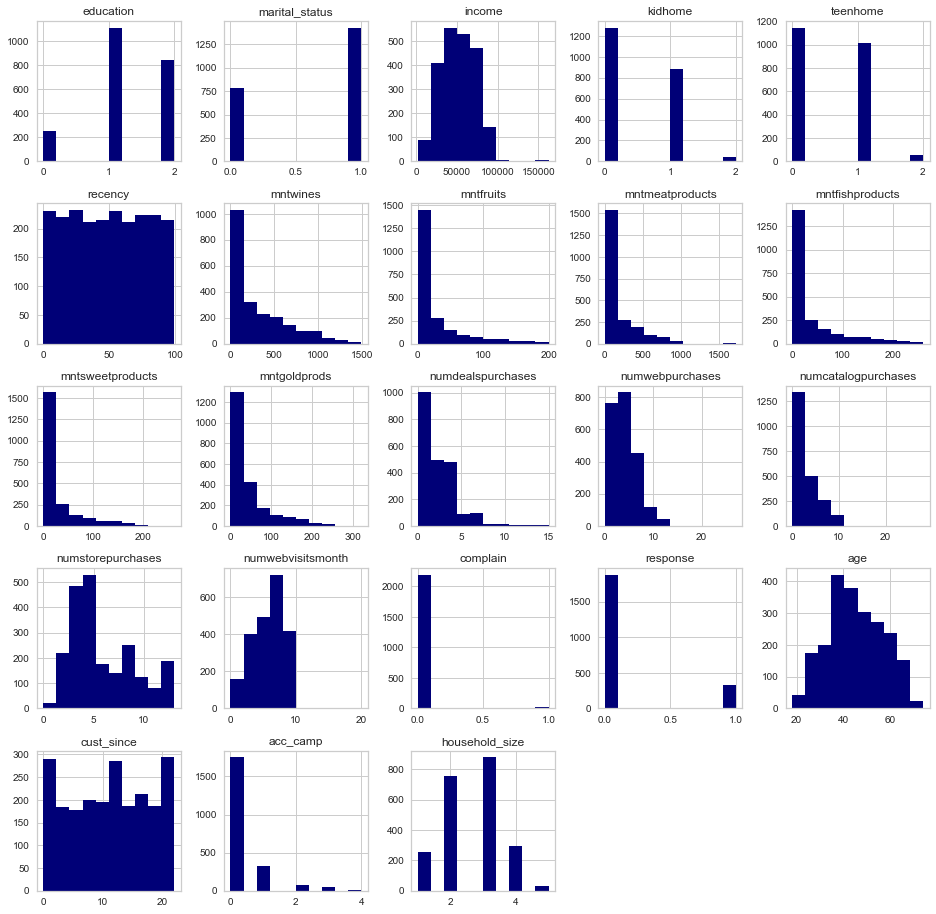

In [1516]:
df.hist(figsize=(16,16))
plt.show()

## preprocessing for modeling

### encode categorical features

In [1517]:
# heatmap to show mean of each feature in the cluster
from sklearn.preprocessing import OneHotEncoder

In [1518]:
df["marital_status"]=pd.get_dummies(df["marital_status"], drop_first=True)

In [1519]:
df["marital_status"]

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: marital_status, Length: 2210, dtype: uint8

### Standard scaler

In [1520]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
0,1,0,58138,0,0,58,635,88,546,172,...,8,10,4,7,0,1,57,21,0,1
1,1,0,46344,1,1,38,11,1,6,2,...,1,1,2,5,0,0,60,3,0,3
2,1,1,71613,0,0,26,426,49,127,111,...,8,2,10,4,0,0,49,10,0,2
3,1,1,26646,1,0,26,11,4,20,10,...,2,0,4,6,0,0,30,4,0,3
4,2,1,58293,1,0,94,173,43,118,46,...,5,3,6,5,0,0,33,5,0,3


,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
0,-0.410707,-1.351328,0.286830,-0.823378,-0.928803,0.309128,0.977263,1.551050,1.689265,2.452226,...,1.427909,2.502328,-0.555510,0.693249,-0.095564,2.378366,1.017632,1.490735,-0.439397,-1.758497
1,-0.410707,-1.351328,-0.260915,1.039125,0.908847,-0.382518,-0.872180,-0.637804,-0.718466,-0.651376,...,-1.125524,-0.571683,-1.170579,-0.131559,-0.095564,-0.420457,1.273963,-1.223290,-0.439397,0.448362
2,-0.410707,0.740013,0.912646,-0.823378,-0.928803,-0.797506,0.357819,0.569840,-0.178956,1.338580,...,1.427909,-0.230126,1.289696,-0.543963,-0.095564,-0.420457,0.334081,-0.167836,-0.439397,-0.655068
3,-0.410707,0.740013,-1.175745,1.039125,-0.928803,-0.797506,-0.872180,-0.562326,-0.656043,-0.505325,...,-0.760748,-0.913239,-0.555510,0.280845,-0.095564,-0.420457,-1.289351,-1.072511,-0.439397,0.448362
4,1.125101,0.740013,0.294029,1.039125,-0.928803,1.554091,-0.392036,0.418884,-0.219085,0.151909,...,0.333580,0.111431,0.059559,-0.131559,-0.095564,-0.420457,-1.033019,-0.921731,-0.439397,0.448362


## Clustering using  PCA

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(df_scaled_df)

df_scaled_df = pca.transform(df_scaled_df)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(df.columns)+1))]

df_scaled_df = pd.DataFrame(df_scaled_df, columns = cols)

df_scaled_df= df_scaled_df.iloc[:,:11]
df_scaled_df

### Getting Variances

print(pca.explained_variance_ratio_)

variances = pca.explained_variance_ratio_.tolist()

total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(22)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

### Getting the PCA coefficients

pca.components_

for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,df.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

In [1521]:
df

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size
0,1,0,58138,0,0,58,635,88,546,172,...,8,10,4,7,0,1,57,21,0,1
1,1,0,46344,1,1,38,11,1,6,2,...,1,1,2,5,0,0,60,3,0,3
2,1,1,71613,0,0,26,426,49,127,111,...,8,2,10,4,0,0,49,10,0,2
3,1,1,26646,1,0,26,11,4,20,10,...,2,0,4,6,0,0,30,4,0,3
4,2,1,58293,1,0,94,173,43,118,46,...,5,3,6,5,0,0,33,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,1,61223,0,1,46,709,43,182,42,...,9,3,4,5,0,0,47,12,0,3
2236,2,1,64014,2,1,56,406,0,30,0,...,8,2,5,7,0,0,68,0,1,5
2237,1,0,56981,0,0,91,908,48,217,32,...,2,3,13,6,0,0,33,5,1,1
2238,2,1,69245,0,1,8,428,30,214,80,...,6,5,10,3,0,0,58,5,0,3


## Clustering using K-Means

In [1522]:
kmeans1 = KMeans(n_clusters=4, init="k-means++", random_state=1234)
kmeans1.fit(df_scaled_df)

KMeans(n_clusters=4, random_state=1234)

In [1523]:
kmeans1.labels_

array([1, 3, 1, ..., 1, 2, 3], dtype=int32)

In [1524]:
import pickle
#model = KMeans()
with open("Model/kmeans_6.pickle", "wb") as f:
    pickle.dump(kmeans1,f)

In [1525]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [1526]:
load("Model/kmeans_6.pickle") 

KMeans(n_clusters=4, random_state=1234)

### K-Means Scatterplot Example

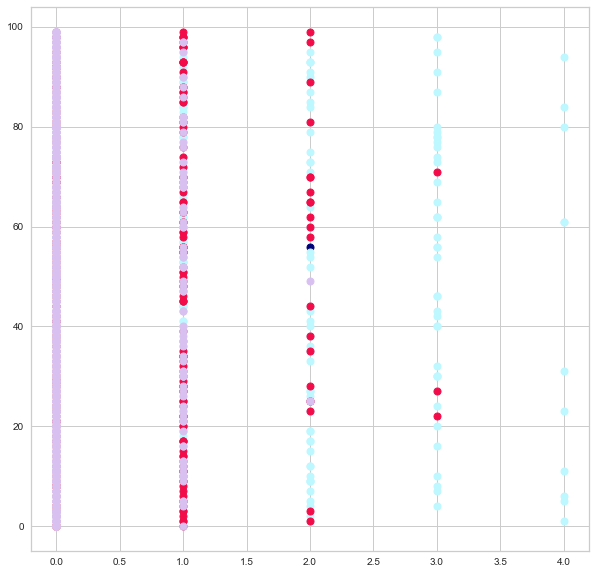

In [1440]:
# assign a cluster to each example
labels = kmeans1.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
plt.figure(figsize=(10, 10))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples (2="income", 6="mntwine")
    pyplot.scatter(df.to_numpy()[row_ix, 2], df.to_numpy()[row_ix, 6],linewidths=1)
pyplot.show()

In [1441]:
clusters = kmeans1.predict(df_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0      20
1     573
2     611
3    1006
dtype: int64

In [1442]:
df["cluster"] = clusters

In [1443]:
df[df['cluster'] == 2].sample()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,household_size,cluster
151,1,1,65747,0,1,96,346,17,48,23,...,1,6,6,0,0,45,3,1,3,2


In [1444]:
kmeans1.inertia_

33370.93144794723

### Elbow method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

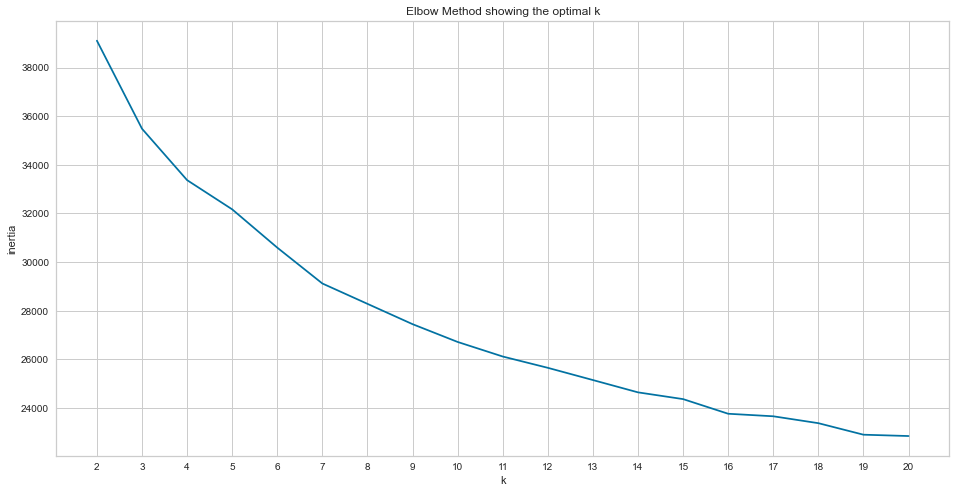

In [1445]:
K = range(2, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

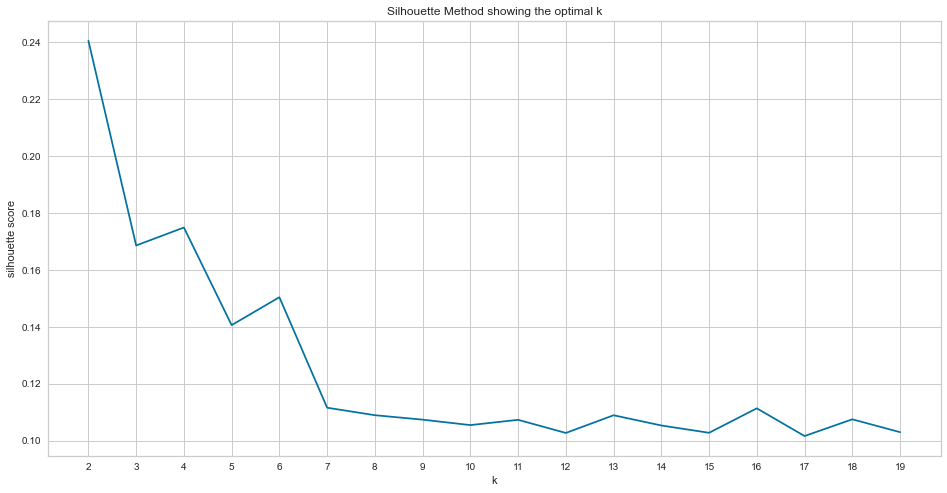

In [1446]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
   
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### visualize Silhouette

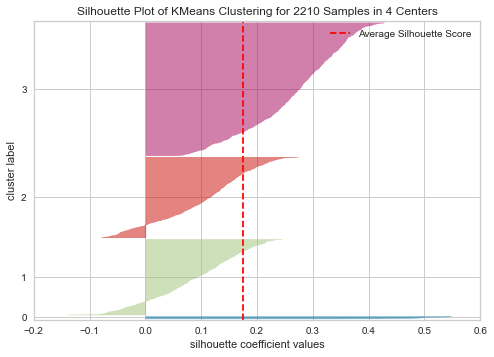

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2210 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [1461]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        
visualizer.show()       

### Ninas Heatmap

In [1448]:
df = df.reset_index(drop=True)

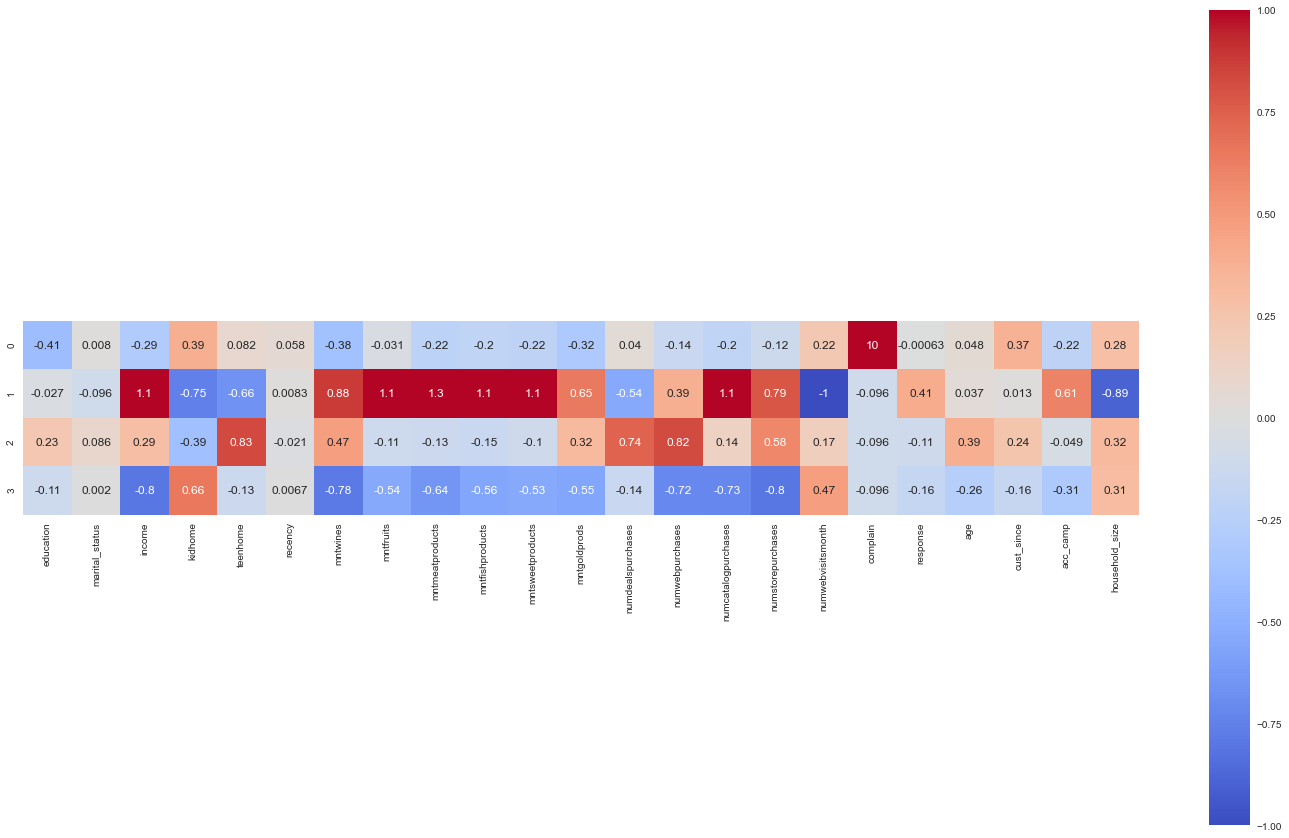

In [1449]:
#create dictionary of cluster membership for each label
cluster_labels = np.unique(df.cluster)
cluster_members = {}
for clusters in cluster_labels:
    cluster_members[clusters] = np.where(df.cluster == clusters)

#for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([df_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

#plot results as heatmap 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


## Describing + plotting Clusters 

### Save df as excel file

In [1450]:
df.to_excel(r'df_clean2.xlsx', index = False)

In [1451]:
df.to_csv(r'df_clean2.csv', index = False)

### exclude cluster 4

In [1452]:
df = df.drop(df[df.cluster == 4].index)
df["cluster"].value_counts()

3    1006
2     611
1     573
0      20
Name: cluster, dtype: int64

### Create custom color palette for seaborn

In [1453]:
#array with colours (dark blue: 000077, Blau: AEBBF4, light blue: BDF7FF, Lila: D8C1F1, red: F20C49, coral: F29188)
colors = ["#000077","#BDF7FF","#F20C49", "#D8C1F1", "#AEBBF4","#F29188"]
customPalette = sns.set_palette(sns.color_palette(colors))

## Features plotted by Clusters

### Education by Cluster

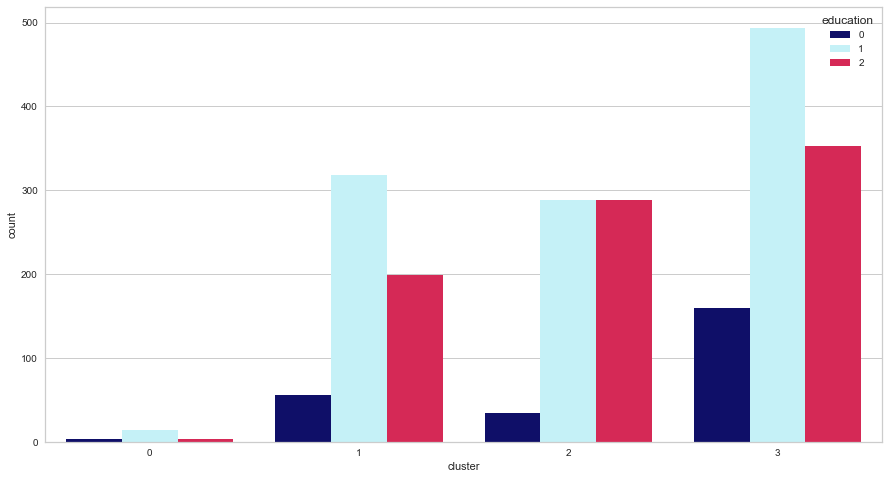

In [1454]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["education"], palette=sns.color_palette(customPalette, 3))

### Marital Status by Cluster

Text(0.5, 1.0, 'Marital Status by Cluster')

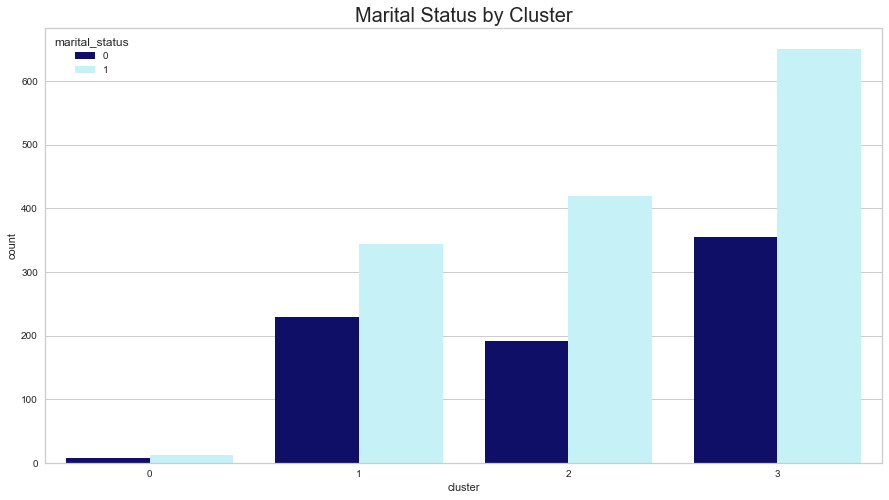

In [1455]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["marital_status"], palette=sns.color_palette(customPalette, 2))
plt.title('Marital Status by Cluster', fontsize=20)

### Income by Cluster

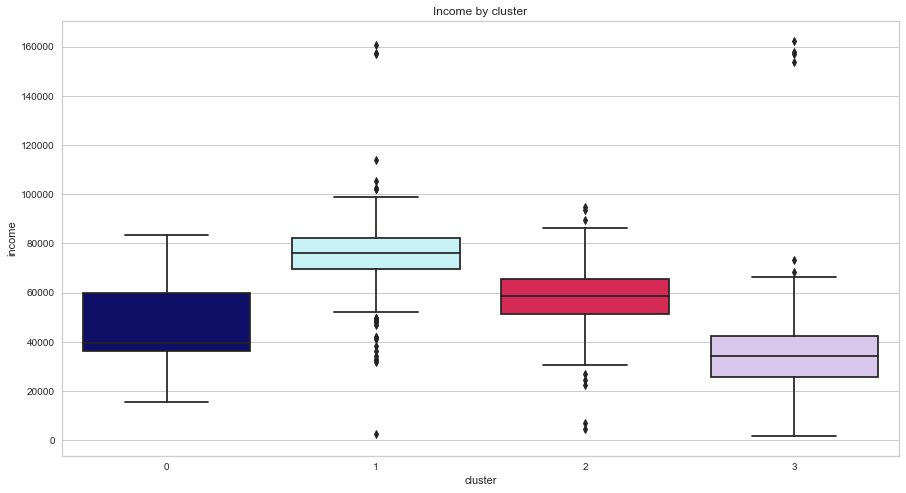

In [1456]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["income"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Income by cluster")
plt.show()

### Children by Cluster

<Figure size 1440x1440 with 0 Axes>

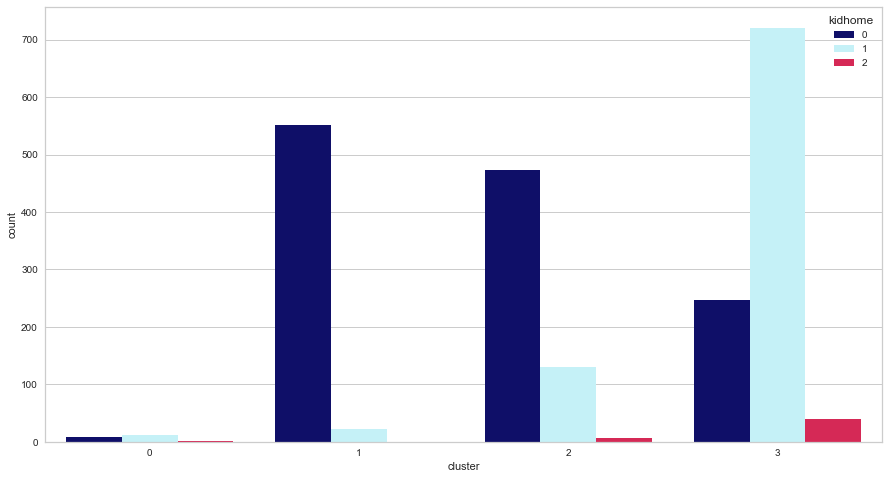

<Figure size 1440x1440 with 0 Axes>

In [1457]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["kidhome"], palette=sns.color_palette(customPalette, 3))
plt.figure(figsize=(20,20))

### Teenagers by Cluster

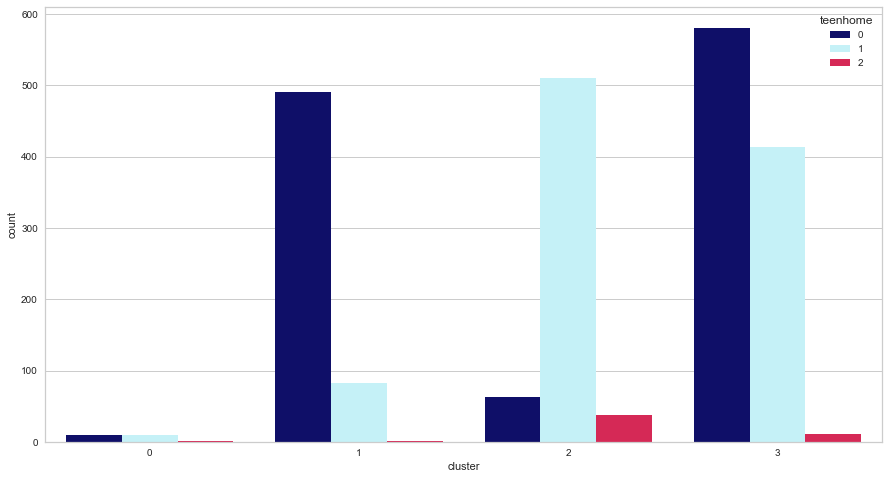

In [1458]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["teenhome"], palette=sns.color_palette(customPalette, 3))

### Recency by Cluster

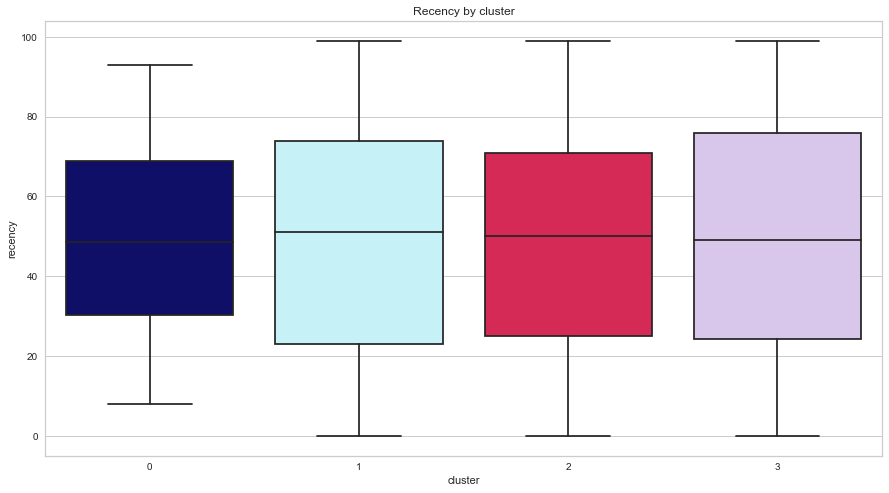

In [1459]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["recency"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Recency by cluster")
plt.show()

In [1460]:
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["total_spent"], palette=customPalette)
pl.set_xlabel("Total spent distribution by Cluster")
plt.show()

KeyError: 'total_spent'

<Figure size 1080x576 with 0 Axes>

### Wines by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntwines"], palette=customPalette)
pl.set_xlabel("Wine by Cluster")
plt.show()

### Fruit by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntfruits"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Fruit by cluster")
plt.show()

### Meat products by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntmeatproducts"], palette=customPalette)
pl.set_xlabel("Meat Products by Cluster")
plt.show()

### Fish Products by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntfishproducts"], palette=customPalette)
pl.set_xlabel("Fish Products by Cluster")
plt.show()

### Sweet Products by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntsweetproducts"], palette=customPalette)
pl.set_xlabel("Sweet Products by Cluster")
plt.show()

### Gold Products by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntgoldprods"], palette=customPalette)
pl.set_xlabel("Gold Products by Cluster")
plt.show()

### Number of Deals purchased by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numdealspurchases"], palette=customPalette)
pl.set_xlabel("Number of Deals by Cluster")
plt.show()

### Number of Web Purchases by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebpurchases"], palette=customPalette)
pl.set_xlabel("Number of Web Purchases by Cluster")
plt.show()

### Number of Catalogue Purchases by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numcatalogpurchases"], palette=customPalette)
pl.set_xlabel("Number of Catalogue Purchases by Cluster")
plt.show()

### Number of Store Purchases by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numstorepurchases"], palette=customPalette)
pl.set_xlabel("Number of Store Purchases by Cluster")
plt.show()

### Web Visits by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebvisitsmonth"], palette=customPalette)
pl.set_xlabel("web Visits Purchases by Cluster")
plt.show()

### Complaints by Cluster

In [ ]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["complain"], palette=sns.color_palette(customPalette, 2))

### Response by Cluster

In [ ]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["response"], palette=sns.color_palette(customPalette, 2))

### Age by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["age"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Age by cluster")
plt.show()

### Accepted Campaigns by Cluster

In [ ]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["acc_camp"],palette=sns.color_palette(customPalette, 5))

### Total Amount spent by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["total_spent"], palette=customPalette)
pl.set_xlabel("Total Amount Spent by Cluster")
plt.show()

### Household Size by Cluster

In [ ]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["household_size"], palette=sns.color_palette(customPalette, 6))

### Customer_since by Cluster

In [ ]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["cust_since"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Customer_since by cluster (in months)")
plt.show()

## Plotting features against each other 

### Wines by Education

In [ ]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Children

In [ ]:
sns.set_palette(customPalette)
sns.violinplot(x="kidhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Teenager

In [ ]:
sns.set_palette(customPalette)
sns.violinplot(x="teenhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Meat Products by Education

In [ ]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntmeatproducts", data=df, palette=sns.color_palette(customPalette, 3))

### Fish Products by Education

In [ ]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntfishproducts", data=df, palette=sns.color_palette(customPalette, 3))

## RFM Analysis

RFM modelling is a marketing analysis technique used to assess customer value. The RFM model is based on three factors:
- Recency = the interval between the last action and today
- Frequency = the number of actions between the user’s signup date and today
- Monetary value = the sum of revenue within the user’s lifetime

### create new df and columns for RFM

In [ ]:
#create frequency column
df["frequency"] = df["numcatalogpurchases"] + df["numstorepurchases"] + df["numwebpurchases"]
df["frequency"]

In [ ]:
#create new df 
rfm_df = df.filter(['recency','frequency','total_spent'], axis=1)

In [ ]:
#create monetary column
df["monetary"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

### get quartiles

In [ ]:
#calculate quartiles
quartiles = rfm_df.quantile([0.25, 0.5, 0.75])

In [ ]:
#save quartiles in dictionary
quantiles.to_dict()

In [ ]:
#Recency Score (x = value, p = recency, monetary_value, frequency, q = quartiles dict)
def rscore(x,p,q):
    if x <= q[p][0.25]:
        return 1
    elif x <= q[p][0.50]:
        return 2
    elif x <= q[p][0.75]: 
        return 3
    else:
        return 4

#Frequency + Monetary Score
def fmscore(x,p,q):
    if x <= q[p][0.25]:
        return 4
    elif x <= q[p][0.50]:
        return 3
    elif x <= q[p][0.75]: 
        return 2
    else:
        return 1

### RFM segmentation table

In [ ]:
#combine scores to create a single score 
rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [ ]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

In [ ]:
rfm_df.sort_values(by=['rfmscore', 'monetary'], ascending=[True, False])

In [ ]:
rfm_df.groupby('rfmscore').agg('monetary').mean()

In [ ]:
rfm_df['Total Score'] = rfm_df['r_quartile'] + rfm_df['f_quartile'] +rfm_df['m_quartile']
print(rfm_df.head(), rfm_df.info())

In [ ]:
rfm_df.groupby('Total Score').agg('monetary').mean().groupby('Total Score').agg('monetary').mean()



In [ ]:
rfm_df.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfm_df.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfm_df.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
ax=rfm_df.groupby('Total Score').agg(df['response']).mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Responders")

### label customer groups

In [ ]:
print("top customers: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print("loyal customers: ",len(rfm_df[rfm_df['f_quartile']==4]))
print("big spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))
print("new customers: ", len(rfm_df[rfm_df['rfmscore']=='411']))
print("almost lost: ",len(rfm_df[rfm_df['rfmscore']=='144']))
print("lost: ",len(rfm_df[rfm_df['rfmscore']=='111']))

In [ ]:
df["cluster"].value_counts()

## plot RFM elements by Cluster

### Frequency by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["frequency"])
pl.set_title("Frequency by Cluster")
plt.show() 

### Recency by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["recency"])
pl.set_title("Recency by Cluster")
plt.show() 

### Monetary by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["monetary"])
pl.set_title("Monetary by Cluster")
plt.show() 